1 ) Mean Median and Mode - Adding a large value increases the Mean, no effect on Median

In [24]:
import numpy as np 
from scipy import stats

#np.random.normal (mean, deviation, size)

sample = np.random.normal(20, 1, 1000)
sample = np.append(sample, [10000])
print ("mean",np.mean(sample))
print ("median",np.median(sample))

print ("mode", stats.mode(sample))

('mean', 29.937091194719482)
('median', 19.962771019622654)
('mode', ModeResult(mode=array([ 16.98284465]), count=array([1])))


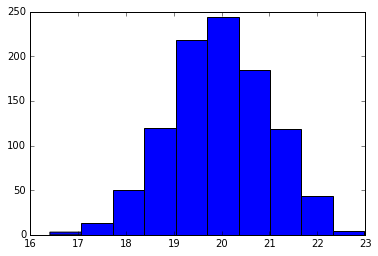

In [10]:
%matplotlib inline 

import matplotlib.pyplot as plt
plt.hist(sample)
plt.plot()
plt.show()




1) Percentile
2) Moments 
    1st Moment = Mean 
    2nd Moment = Variance  (Square of Std Deviation)
    3rd Moment = Skew (how lopsided is the distribution)
    4rth Moment = Kurtosis

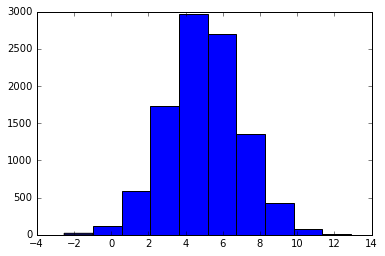

('20th percentile', 3.3445693643622612)
('50th percentile', 4.9877403855874221)
('variance', 3.9868403097277727)
('variance from np', 3.9868403097277727)
('skew', 0.01894809503119331)
('kurtosis', 0.09835701340758796)


In [39]:
sample_set_2 = np.random.normal (5,2,10000)
plt.hist(sample_set_2)
plt.plot()
plt.show()
#Value at which it is greater than 20% of the values 
print ("20th percentile", np.percentile(sample_set_2, 20))
#Value at which it is greater than 50% of the values - should be close to mean 
print ("50th percentile", np.percentile(sample_set_2, 50))
#variance is square of mean 
print ("variance", np.var(sample_set_2))
print ("variance from np", sample_set_2.var())


import scipy.stats as sp
#skew - Look at positive or negative
print ("skew", sp.skew(sample_set_2))
#higher peaks Higher Kurtosis
print ("kurtosis", sp.kurtosis(sample_set_2))


CoVariance and Corelation 
CoVariance - Relation between 2 variable (0 to Inifinity)
We need to bound this - That is where CoRelation comes in 
Corelation = (CoVariance/Std Deviation)  (-1 to 1)

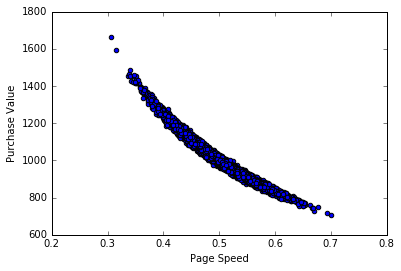

('Correlation ', array([[ 1.        , -0.98251769],
       [-0.98251769,  1.        ]]))
('Covariance:', array([[  1.09168763e+04,  -5.11650377e+00],
       [ -5.11650377e+00,   2.48409070e-03]]))


In [55]:
#create a linear Correlation dataSet
#PageSpeeds Vs Purchase value

pageSpeeds = np.random.normal(0.5,0.05, 10000)
purchaseValue = np.random.normal(500,6,10000)/pageSpeeds

plt.scatter(pageSpeeds, purchaseValue)
plt.axes()
plt.xlabel('Page Speed')
plt.ylabel('Purchase Value')
plt.plot()

plt.show()
#perfect correlation
print ("Correlation ", np.corrcoef( purchaseValue, pageSpeeds))

print("Covariance:",np.cov( purchaseValue, pageSpeeds))


Bayes Theorem 

P(A/B) = (P(A) * P(B/A)) / P(B) 

Event A = User of Drug 
Event B = User Tested Positive

P(A)  = 0.3%
P(B/A) = 99% 
What about P(A/B) 
P(B)  = 0.99*0.003 + 0.99* (1-0.003) = 0.0129 (Probability of Testing if you are a user + Probability of Testing if you are not a user)

P(A/B) = (0.3*0.99)/0.0129 = 0.23 
So only 23% of users tested positive can be users

Predictive Models 

Linear Regression  - Using Least Squared (Minimises the squared error between predicted and actual)
Poly Regression 
Multivariate Regression 

('Rsquared ', 1.9999999999999998)


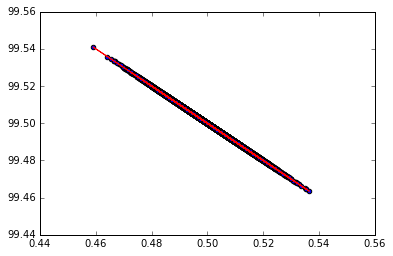

('r_square_sk_Metrics', 1.0)


In [64]:
#Data Preparation 
#PageSpeed, PurchaseValue Linear Relation 

pageSpeeds = np.random.normal(0.5, 0.01, 10000)
purchaseValue  = 100 - pageSpeeds

from scipy import stats
slope, intercept, r_value, pvalue, std_erro = stats.linregress(pageSpeeds, purchaseValue)

#This is not normalized - Used sk_metrics for normalization 
print ("Rsquared ", abs(r_value*2))



def calculateYfromX(x_values):
    return slope*x_values + intercept

purchase_value_predicted = calculateYfromX(pageSpeeds)

plt.scatter(pageSpeeds,purchaseValue)
plt.plot(pageSpeeds, purchase_value_predicted, c='r')
plt.show()


from sklearn.metrics import r2_score
print ("r_square_sk_Metrics", r2_score(purchaseValue,purchase_value_predicted))

('max_Value', 12.108692623805201)
         3         2
-0.2805 x + 8.871 x - 103.6 x + 529.8


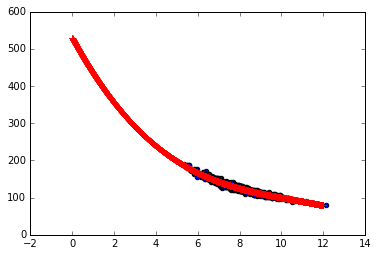

('RSquared is: ', 0.95063659625340136)


In [92]:
#PolyRegression 
np.random.seed(2)
#Create a non linear relation 
pageSpeed = np.random.normal(8.0,1.0, 1000)
print ("max_Value" ,pageSpeed.max())
purchaseValue = np.random.normal(1000,30,1000)/pageSpeed
#plt.hist(purchaseValue)
#plt.hist(pageSpeed)


plt.scatter(pageSpeed,purchaseValue)

p3 = np.poly1d(np.polyfit(pageSpeed,purchaseValue,3))
print p3

#pick 5000 samples
pageSpeed_sample = np.linspace(0,12,5000)
plt.plot(pageSpeed_sample,p3(pageSpeed_sample),'r+')
plt.show()

#This looks pretty neat.. Lets look in terms of r2
from sklearn.metrics import r2_score

r2 = r2_score(purchaseValue,p3(pageSpeed))
print("RSquared is: ", r2)
#pretty good